In [17]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


In [4]:
col=["Height","Weight"]
S1=MinMaxScaler()
df1[col]=S1.fit_transform(df1[col])
df1

,Gender,Height,Weight
0,Male,0.165212,0.863139
1,Male,0.122482,0.475476
2,Male,0.167432,0.721131
3,Male,0.147361,0.756699
4,Male,0.131761,0.689999
...,...,...,...
9995,Female,0.100470,0.351101
9996,Female,0.108016,0.517161
9997,Female,0.081028,0.310660
9998,Female,0.968224,0.482988


In [19]:
X=df1[["Height"]].to_numpy()
Y=df1[["Weight"]].to_numpy()
Y.shape

(10000, 1)

In [ ]:
Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [23]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=67)

In [20]:
# Create a linear regression model

model=LinearRegression()

In [12]:
## Training  Linear regressions model

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
## Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

# Print model coefficients
print(model.coef_[0])
print(model.intercept_)

0.004438047889011697
0.8135299373473701
[3.54709605]
[0.10829265]


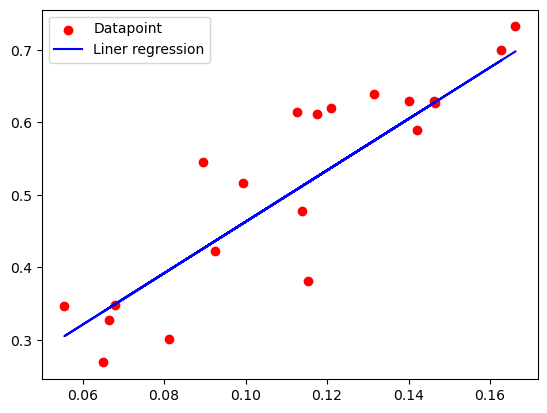

In [26]:
# Plot the linear regression Model
plt.scatter(X_test[0:20],Y_test[0:20],color="Red",label="Datapoint")
plt.plot(X_test[0:20],Y_pred[0:20],color="Blue",label="Liner regression")
plt.legend()

In [36]:
df2=pd.read_csv("weight-height.csv")
X = df2['Height'].values.reshape(-1, 1)
X.shape
Y=df2["Weight"].values

In [37]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization).
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)

In [38]:
#add another feature to X corresponding to bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        ,  1.75827913],
       [ 1.        ,  0.56277158],
       [ 1.        ,  1.82037531],
       ...,
       [ 1.        , -0.59704831],
       [ 1.        , 24.22511229],
       [ 1.        , -1.05110595]])

In [41]:
import numpy as np

# Suppose X and Y are already defined, with
# X.shape = (num_samples, num_features)
# Y.shape = (num_samples, )

# Weight (parameter) initialization
theta = np.zeros(X.shape[1])   # shape: (num_features,)

# Hyperparameters
iterations = 1000
learning_rate = 0.01

# Gradient Descent
mseh = []   # mean squared error history

print("X shape:", X.shape)
print("Y shape:", Y.shape)

for i in range(iterations):
    # Prediction
    y_pred = np.dot(X, theta)  # shape: (num_samples,)

    # Error
    error = y_pred - Y         # shape: (num_samples,)
    print("Error shape:", error.shape)

    # Gradient computation
    grad = (1 / X.shape[0]) * np.dot(X.T, error)  # shape: (num_features,)
    print("Gradient shape:", grad.shape)

    # Parameter update
    theta = theta - learning_rate * grad

    # Compute MSE for tracking
    mse = np.mean(error ** 2)
    mseh.append(mse)

print("Final parameters (theta):", theta)


X shape: (10000, 2)
Y shape: (10000,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10000,)
Gradient shape: (2,)
Error shape: (10

In [42]:
for i in range(iterations):
    y_pred = np.dot(X, theta)
    mse = mean_squared_error(Y, y_pred)
    mseh.append(mse)
    print(f"Iteration {i+1}: MSE = {mse}")
    gradient = np.dot(X.T, (y_pred - Y)) / len(Y)
    theta -= learningrate * gradient

Iteration 1: MSE = 0.2869054926644624
Iteration 2: MSE = 0.28690549263801457
Iteration 3: MSE = 0.2869054926120931
Iteration 4: MSE = 0.28690549258668746
Iteration 5: MSE = 0.2869054925617874
Iteration 6: MSE = 0.28690549253738284
Iteration 7: MSE = 0.2869054925134639
Iteration 8: MSE = 0.28690549249002095
Iteration 9: MSE = 0.2869054924670446
Iteration 10: MSE = 0.2869054924445254
Iteration 11: MSE = 0.28690549242245433
Iteration 12: MSE = 0.2869054924008225
Iteration 13: MSE = 0.2869054923796212
Iteration 14: MSE = 0.2869054923588417
Iteration 15: MSE = 0.2869054923384758
Iteration 16: MSE = 0.2869054923185151
Iteration 17: MSE = 0.2869054922989517
Iteration 18: MSE = 0.2869054922797776
Iteration 19: MSE = 0.28690549226098505
Iteration 20: MSE = 0.2869054922425664
Iteration 21: MSE = 0.2869054922245144
Iteration 22: MSE = 0.28690549220682154
Iteration 23: MSE = 0.2869054921894808
Iteration 24: MSE = 0.2869054921724851
Iteration 25: MSE = 0.28690549215582767
Iteration 26: MSE = 0.2869

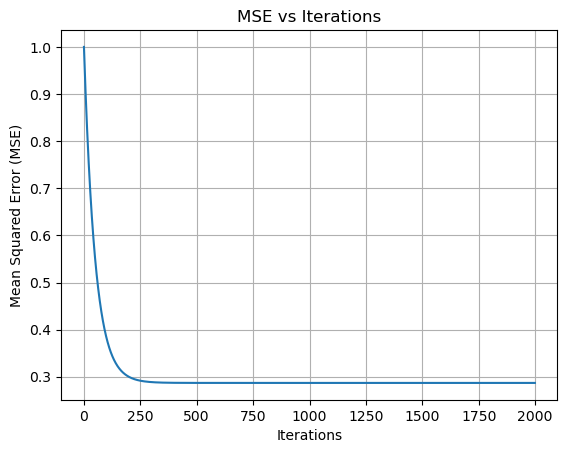

In [44]:
import matplotlib.pyplot as plt

# Plot the MSE over iterations
plt.plot(range(len(mseh)), mseh)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Iterations')
plt.grid(True)
plt.show()


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv("Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [49]:
selected_data = df[['Distance_km', 'Preparation_Time_min',
                      'Traffic_Level', 'Weather', 'Delivery_Time_min']].dropna()



In [50]:
#encode categorical variable
encoded_data=pd.get_dummies(selected_data,columns=['Traffic_Level','Weather'],drop_first=True)
encoded_data

,Distance_km,Preparation_Time_min,Delivery_Time_min,Traffic_Level_Low,Traffic_Level_Medium,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
0,7.93,12,43,True,False,False,False,False,True
1,16.42,20,84,False,True,False,False,False,False
2,9.52,28,59,True,False,True,False,False,False
3,7.44,5,37,False,True,False,True,False,False
4,19.03,16,68,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,8.50,13,54,False,False,False,False,False,False
996,16.28,8,71,True,False,False,True,False,False
997,15.62,26,81,False,False,False,False,True,False
998,14.17,8,55,True,False,False,False,False,False


In [51]:
X=encoded_data.drop("Delivery_Time_min",axis=1)
y=encoded_data['Delivery_Time_min']